# Análise Emocional Integrada
Este notebook unifica a análise e visualização das métricas emocionais, incluindo introspecção, para notícias classificadas como fake e true.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Leitura de dados
data_path = Path('analise_emocional_completa.csv')
if not data_path.exists():
    raise FileNotFoundError(f"Arquivo '{data_path}' não encontrado.")
df = pd.read_csv(data_path)
print(f"Arquivo '{data_path}' carregado com sucesso!")

Arquivo 'analise_emocional_completa.csv' carregado com sucesso!


## Cálculo de Métricas por Categoria

In [2]:
# Comparação das médias por categoria (fake vs true)
analise_comparativa = df.groupby('label')[[
    'media_attitude', 'media_sensitivity', 'media_temper', 'media_introspection'
]].mean().T
print("--- COMPARAÇÃO DAS MÉDIAS POR CATEGORIA ---")
print(analise_comparativa)

# Contagem total de emoções específicas
comparacao_emocoes = df.groupby('label')[[
    'contagem_raiva', 'contagem_medo', 'contagem_tristeza',
    'contagem_alegria', 'contagem_surpresa'
]].sum()
print("\n--- COMPARAÇÃO DAS EMOÇÕES TOTAIS POR CATEGORIA ---")
print(comparacao_emocoes)

--- COMPARAÇÃO DAS MÉDIAS POR CATEGORIA ---
label                    fake      true
media_attitude      -0.015131  0.005504
media_sensitivity    0.052207  0.058972
media_temper         0.026484  0.034369
media_introspection  0.002050  0.026860

--- COMPARAÇÃO DAS EMOÇÕES TOTAIS POR CATEGORIA ---
       contagem_raiva  contagem_medo  contagem_tristeza  contagem_alegria  \
label                                                                       
fake           1774.0         1840.0            23643.0            2777.0   
true           8091.0        13577.0           132244.0           19397.0   

       contagem_surpresa  
label                     
fake                 0.0  
true                 0.0  


## Visualização das Métricas Emocionais

C:\Users\gusta\AppData\Local\Temp\ipykernel_5008\285372966.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=metric, data=df, palette=pal)
C:\Users\gusta\AppData\Local\Temp\ipykernel_5008\285372966.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=metric, data=df, palette=pal)
C:\Users\gusta\AppData\Local\Temp\ipykernel_5008\285372966.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=metric, data=df, palette=pal)
C:\Users\gusta\AppData\Local\Temp\ipykernel_5008\285372966.py:18: FutureWarning: 


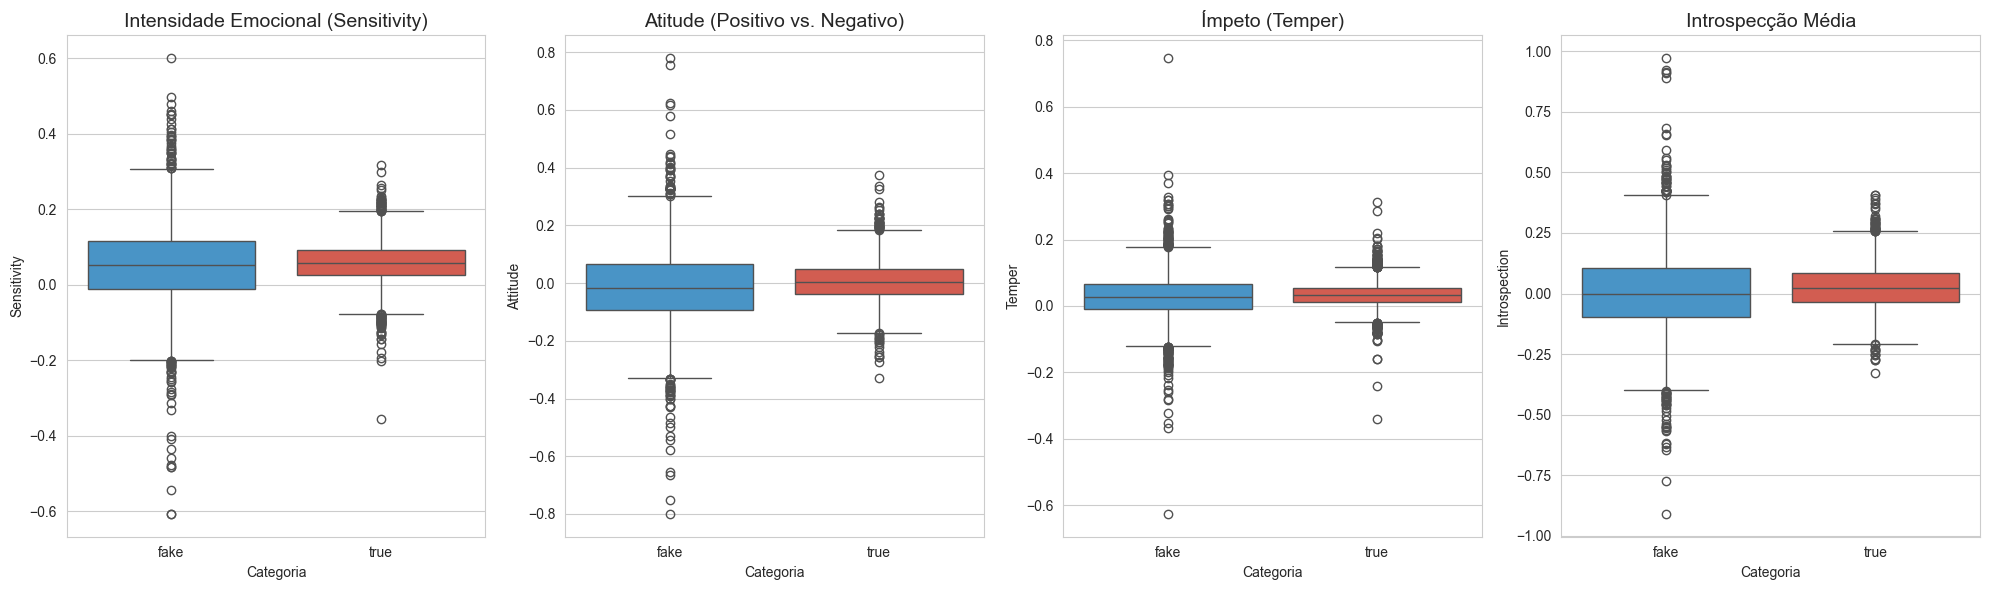

<Figure size 1200x700 with 0 Axes>

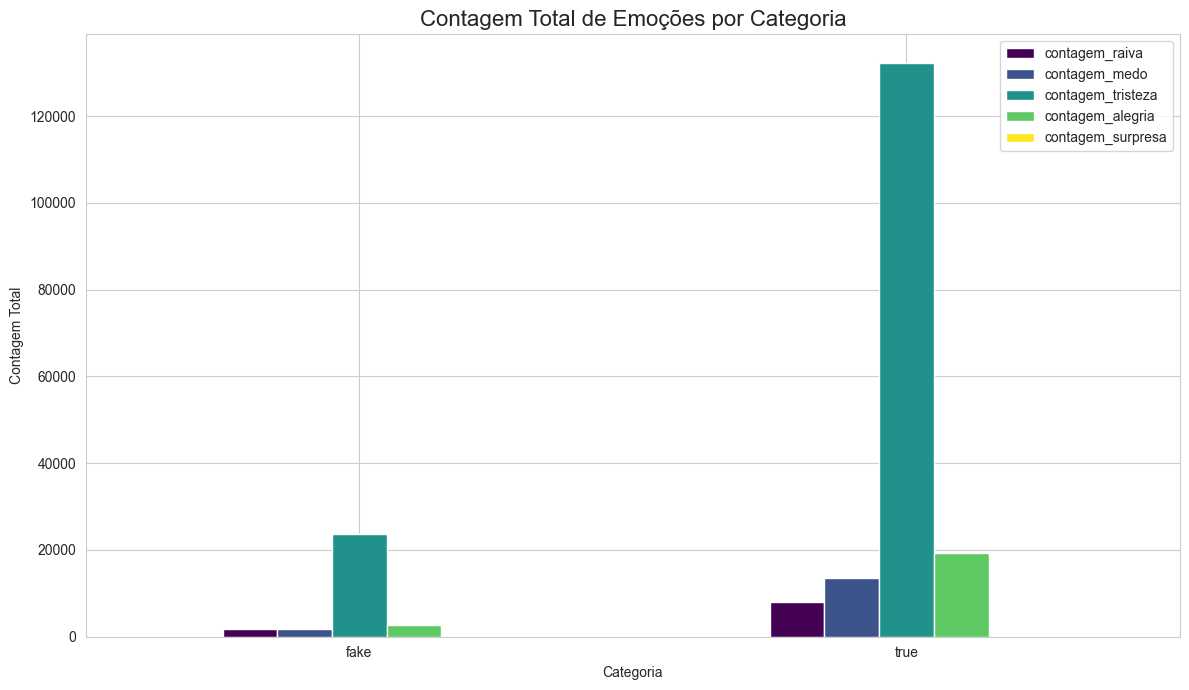

In [3]:
# Configurações de estilo
sns.set_style("whitegrid")

# Boxplots lado a lado para métricas emocionais
plt.figure(figsize=(20, 6))

metrics = ['media_sensitivity', 'media_attitude', 'media_temper', 'media_introspection']
titles = [
    'Intensidade Emocional (Sensitivity)',
    'Atitude (Positivo vs. Negativo)',
    'Ímpeto (Temper)',
    'Introspecção Média'
]
pal = ['#3498db', '#e74c3c']

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(x='label', y=metric, data=df, palette=pal)
    plt.title(titles[i-1], fontsize=14)
    plt.xlabel('Categoria')
    plt.ylabel(metric.replace('media_', '').capitalize())

plt.tight_layout()
plt.savefig('comparacao_metricas_emocionais_integrado.png')
plt.show()

# Gráfico de barras para contagem de emoções
plt.figure(figsize=(12, 7))
comparacao_emocoes.plot(kind='bar', figsize=(12, 7), colormap='viridis')
plt.title('Contagem Total de Emoções por Categoria', fontsize=16)
plt.ylabel('Contagem Total')
plt.xlabel('Categoria')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('comparacao_contagem_emocoes_integrado.png')
plt.show()

## Estatística de Introspecção

In [4]:
# Média de introspecção por categoria
media_introspeccao = df.groupby('label')['media_introspection'].mean()
print("--- MÉDIA DE INTROSPECTION POR CATEGORIA ---")
print(media_introspeccao)

--- MÉDIA DE INTROSPECTION POR CATEGORIA ---
label
fake    0.00205
true    0.02686
Name: media_introspection, dtype: float64
